# Student Performance Indicator

Life Cycle of Machine Learning Project

- Problem Understanding
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose the Best Model


## 1. Problem Statment
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. 

## 2. Data Collection

- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The Data consist of 8 columns and 1000 rows

### 2.1 Import Data and Required packages

Importing Pandas, Numpy , Matplotlib, Seaborn and warning library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

Import the CSV data as pandas Data Frame

In [4]:
df= pd.read_csv(r'C:\Users\win10\Desktop\Upgrad\ML WebApps\notebook\data\data.csv')

Show Top 5 records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Data

In [8]:
df.shape

(1000, 8)

### 2.2 Data Information

- Gender         : sex of student -> (Male/Female)
- race_ethnicity : ethnicity of student -> (Group A,B,C,D,E)
- parantal_level_of_education : Highest level of Degree parents have
- lunch : Type of lunch student is having before test
- test_prepration_course : Completed or not Completed before test
- math score
- reading score
- writing score   

## 3. Data Checks to perform

- Check Missing Values
- Check Duplicates
- Check data type
- Check the number of unique values of each columns
- Check statistics of data set
- Check various categories present in the different categorical columns 

### 3.1 Checking Missing Values

In [11]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the data set

### 3.2 Checking Duplicate Values

In [15]:
df.duplicated().sum()

0

There is no duplicate values in the data set

### 3.3 Checking Data Types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values in each columns

In [17]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Checking the statistics of dataset

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

- From above description of numeric data we can observe the mean are close between 66.08 to 68.05
- All standard deviation are close between 14.60 to 15.19
- While there is minimum score of 0 for math, for writing minimum is much higher = 10 and for reading= 17 


### 3.6 Checking Categorical columns for categorical columns.

Defining Categorical and Numerical columns

In [34]:
categorical_col=[features for features in df.columns if df[features].dtype=='O']
numerical_col=[features for features in df.columns if df[features].dtype != 'O']

print('We have {} categorical columns: {}'.format(len(categorical_col),categorical_col))
print('We have {} numerical columns: {}'.format(len(numerical_col),numerical_col))

We have 5 categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
We have 3 numerical columns: ['math_score', 'reading_score', 'writing_score']


In [40]:
# Checking the categories of the categorical columns

for i in categorical_col:
    print('Categories in \'{}\' variable '.format(i),end=" ")
    print(df[i].unique(),'\n')

Categories in 'gender' variable  ['female' 'male'] 

Categories in 'race_ethnicity' variable  ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in 'parental_level_of_education' variable  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch' variable  ['standard' 'free/reduced'] 

Categories in 'test_preparation_course' variable  ['none' 'completed'] 



### 3.8 Adding Columns for Total Score and Average Score
- These feature we can use as our target feature

In [41]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [45]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_Score']=round(df['Total_Score']/3,2)

Updated Data Frame

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


## 4. Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Function (KDE)

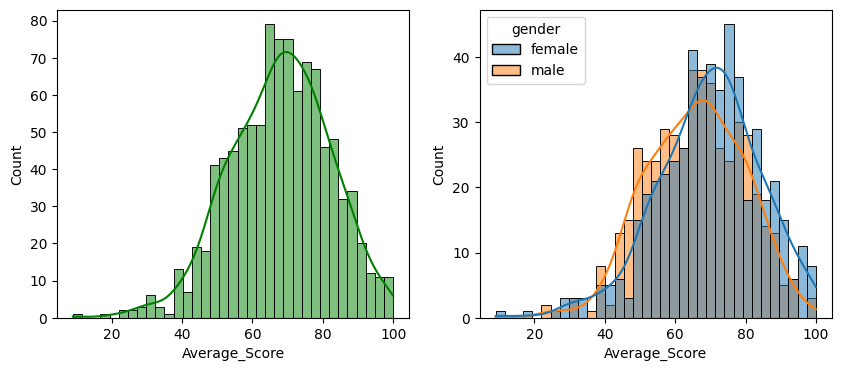

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Average_Score',kde=True,bins=35,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average_Score',kde=True,bins=35,hue='gender')
plt.show()

Insight
- From the above visualization we can observe average score is around 70 for all the student.
- Also we can observe that average score for female is slightly high than male   

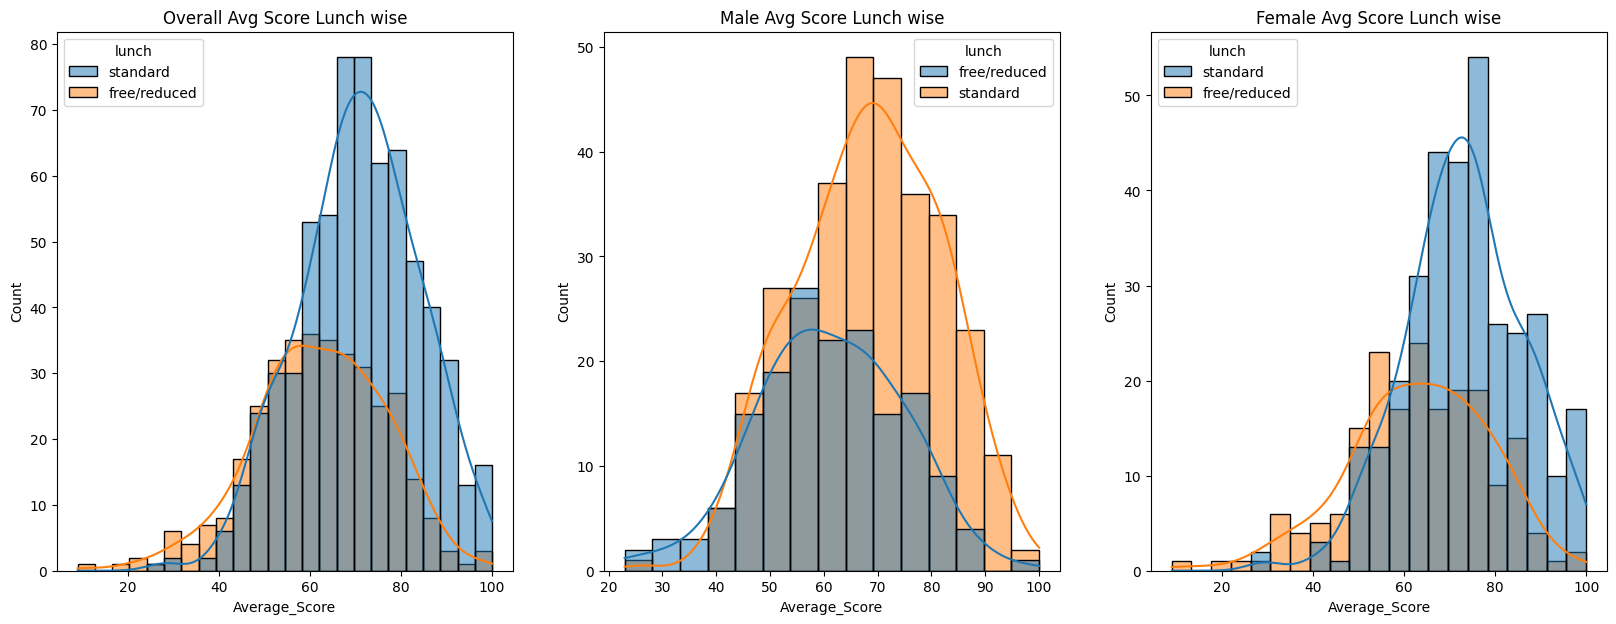

In [82]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
plt.title('Overall Avg Score Lunch wise')
sns.histplot(data=df,x='Average_Score',kde=True,hue='lunch')
plt.subplot(132)
plt.title('Male Avg Score Lunch wise')
sns.histplot(data=df[df['gender']=='male'],x='Average_Score',kde=True,hue='lunch')
plt.subplot(133)
plt.title('Female Avg Score Lunch wise')
sns.histplot(data=df[df['gender']=='female'],x='Average_Score',kde=True,hue='lunch')
plt.show()

Insight
- Standard Lunch helps student to perform well in exam.
- Standard Lunch helps male as well as female student to perform well in exam.

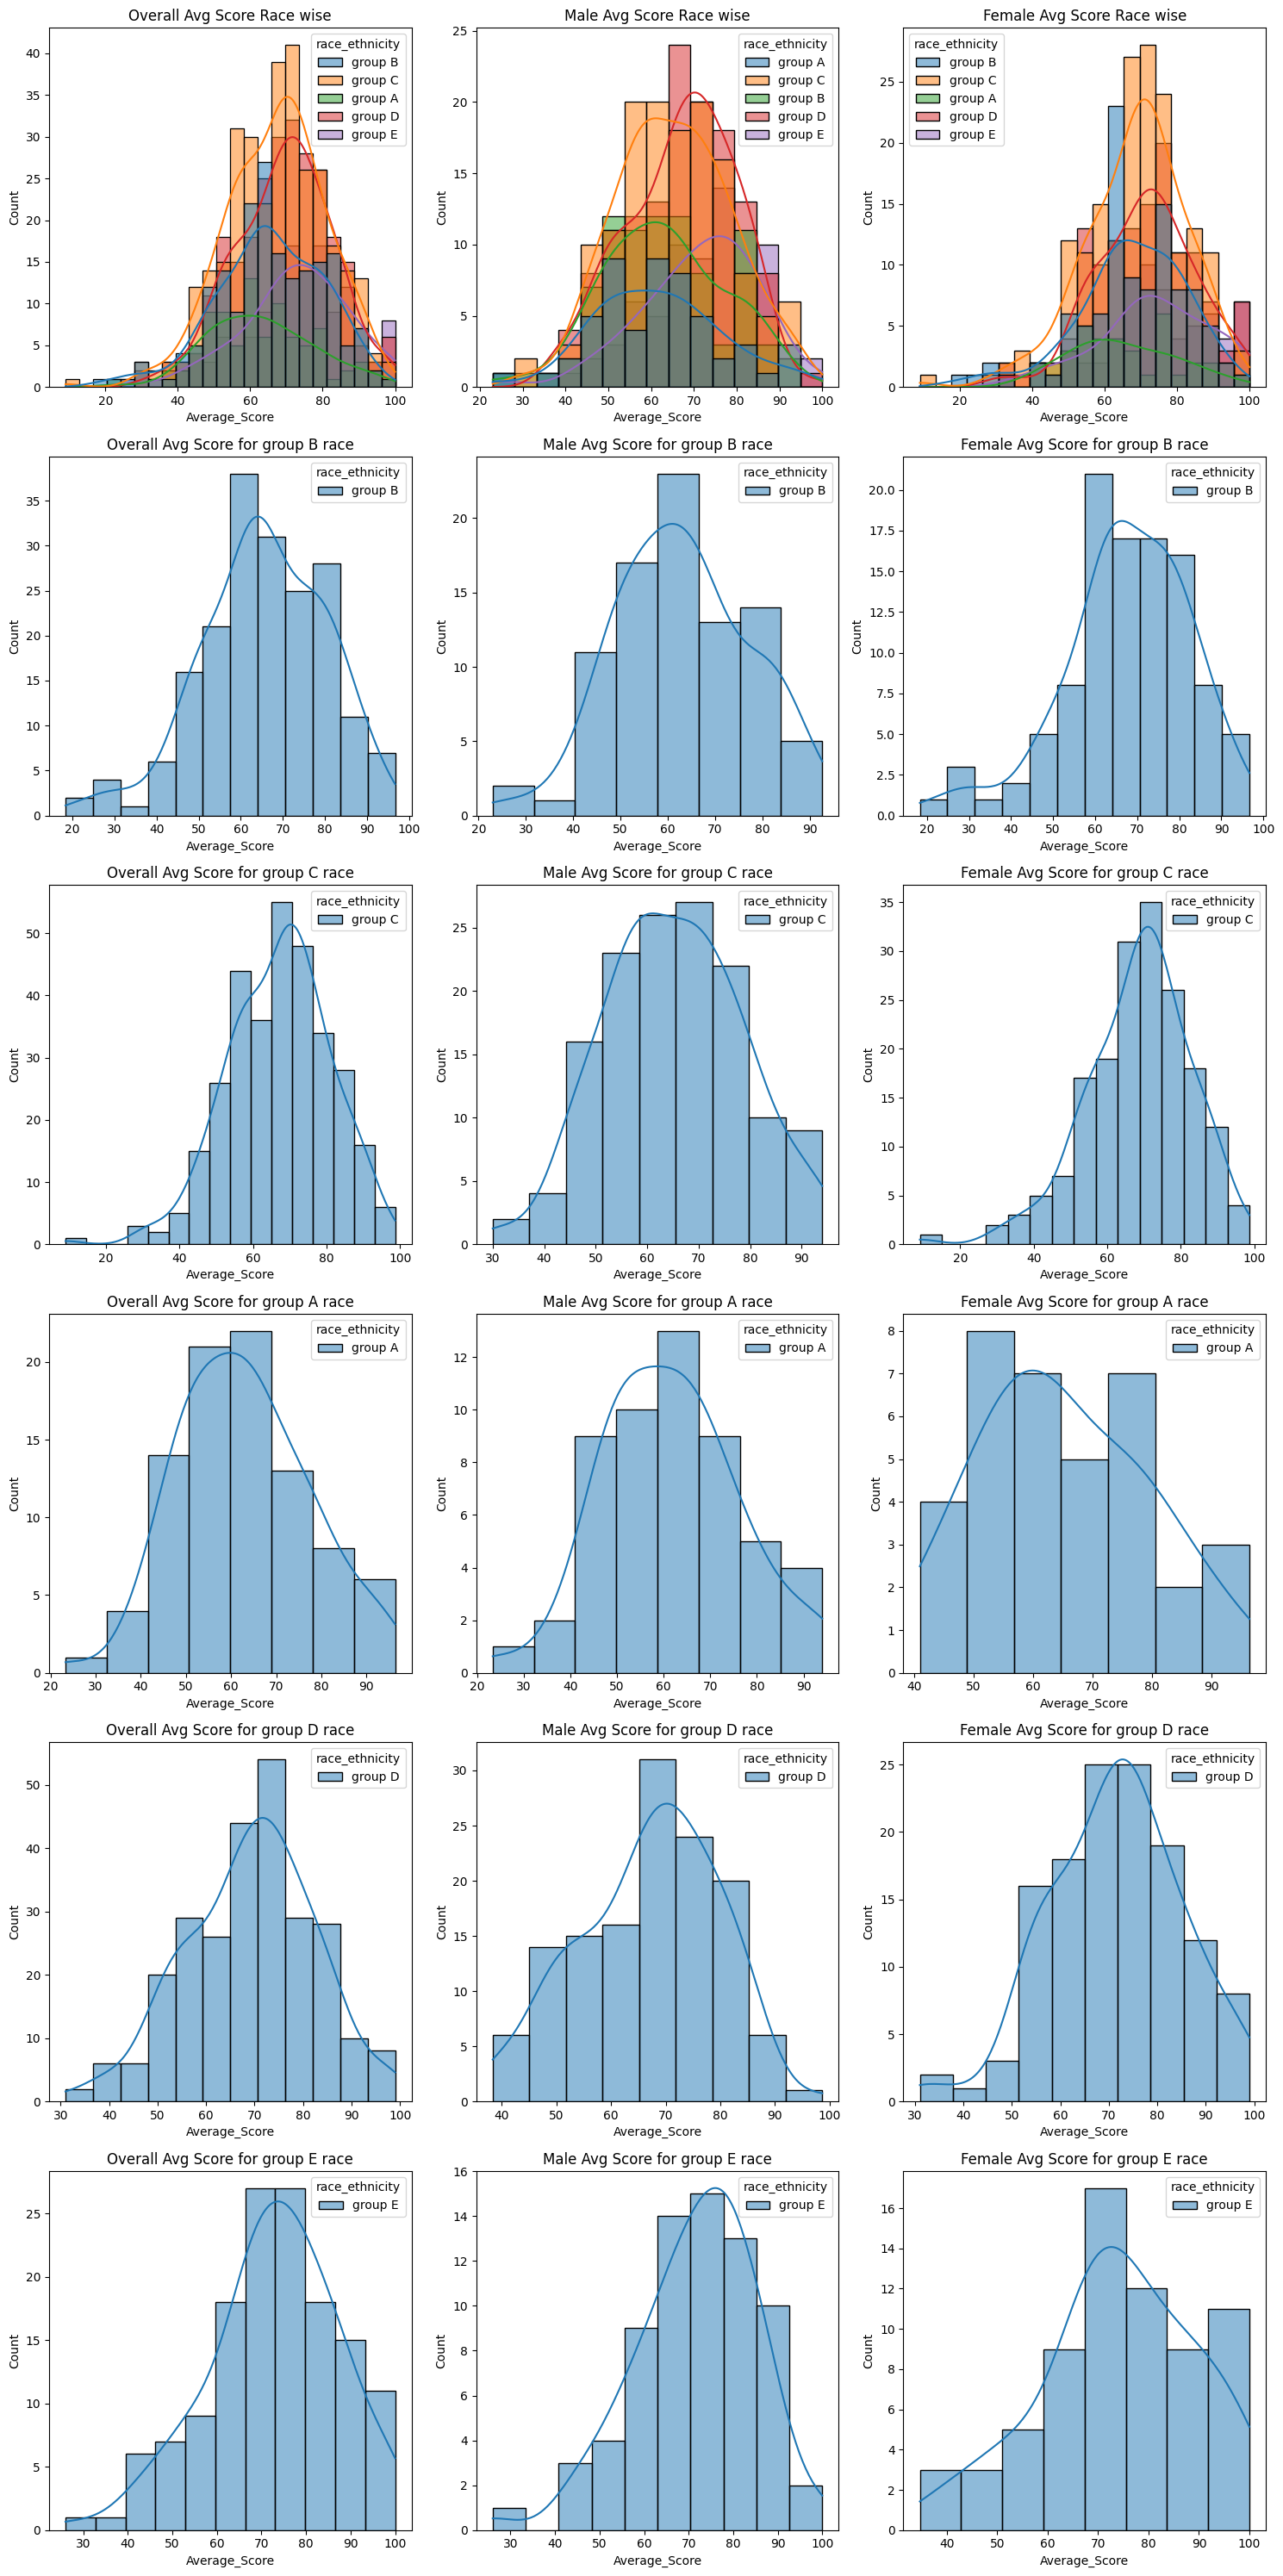

In [124]:
fig, axes = plt.subplots(6, 3, figsize=(15, 30))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

axes[0].set_title('Overall Avg Score Race wise')
sns.histplot(data=df, x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[0])

axes[1].set_title('Male Avg Score Race wise')
sns.histplot(data=df[df['gender']=='male'], x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[1])

axes[2].set_title('Female Avg Score Race wise')
sns.histplot(data=df[df['gender']=='female'], x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[2])

plot_count = 3  # Start from the next subplot

for i in df['race_ethnicity'].unique():
    axes[plot_count].set_title('Overall Avg Score for {} race'.format(i))
    sns.histplot(data=df[df['race_ethnicity']==i], x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[plot_count])
    
    plot_count += 1
    
    axes[plot_count].set_title('Male Avg Score for {} race'.format(i))
    sns.histplot(data=df[(df['gender']=='male') & (df['race_ethnicity']==i)], x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[plot_count])
    
    plot_count += 1
    
    axes[plot_count].set_title('Female Avg Score for {} race'.format(i))
    sns.histplot(data=df[(df['gender']=='female') & (df['race_ethnicity']==i)], x='Average_Score', kde=True, hue='race_ethnicity', ax=axes[plot_count])
    
    plot_count += 1

# Hide any remaining empty subplots
for i in range(plot_count, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Insight 
- Group A : Average Score for male and female are same.
- Group B : Female have better score than male.
- Group C : Female are performing well than the male.
- Group D : Average Score for male and female are same.
- Gropu E : Average Score for male and female are same.

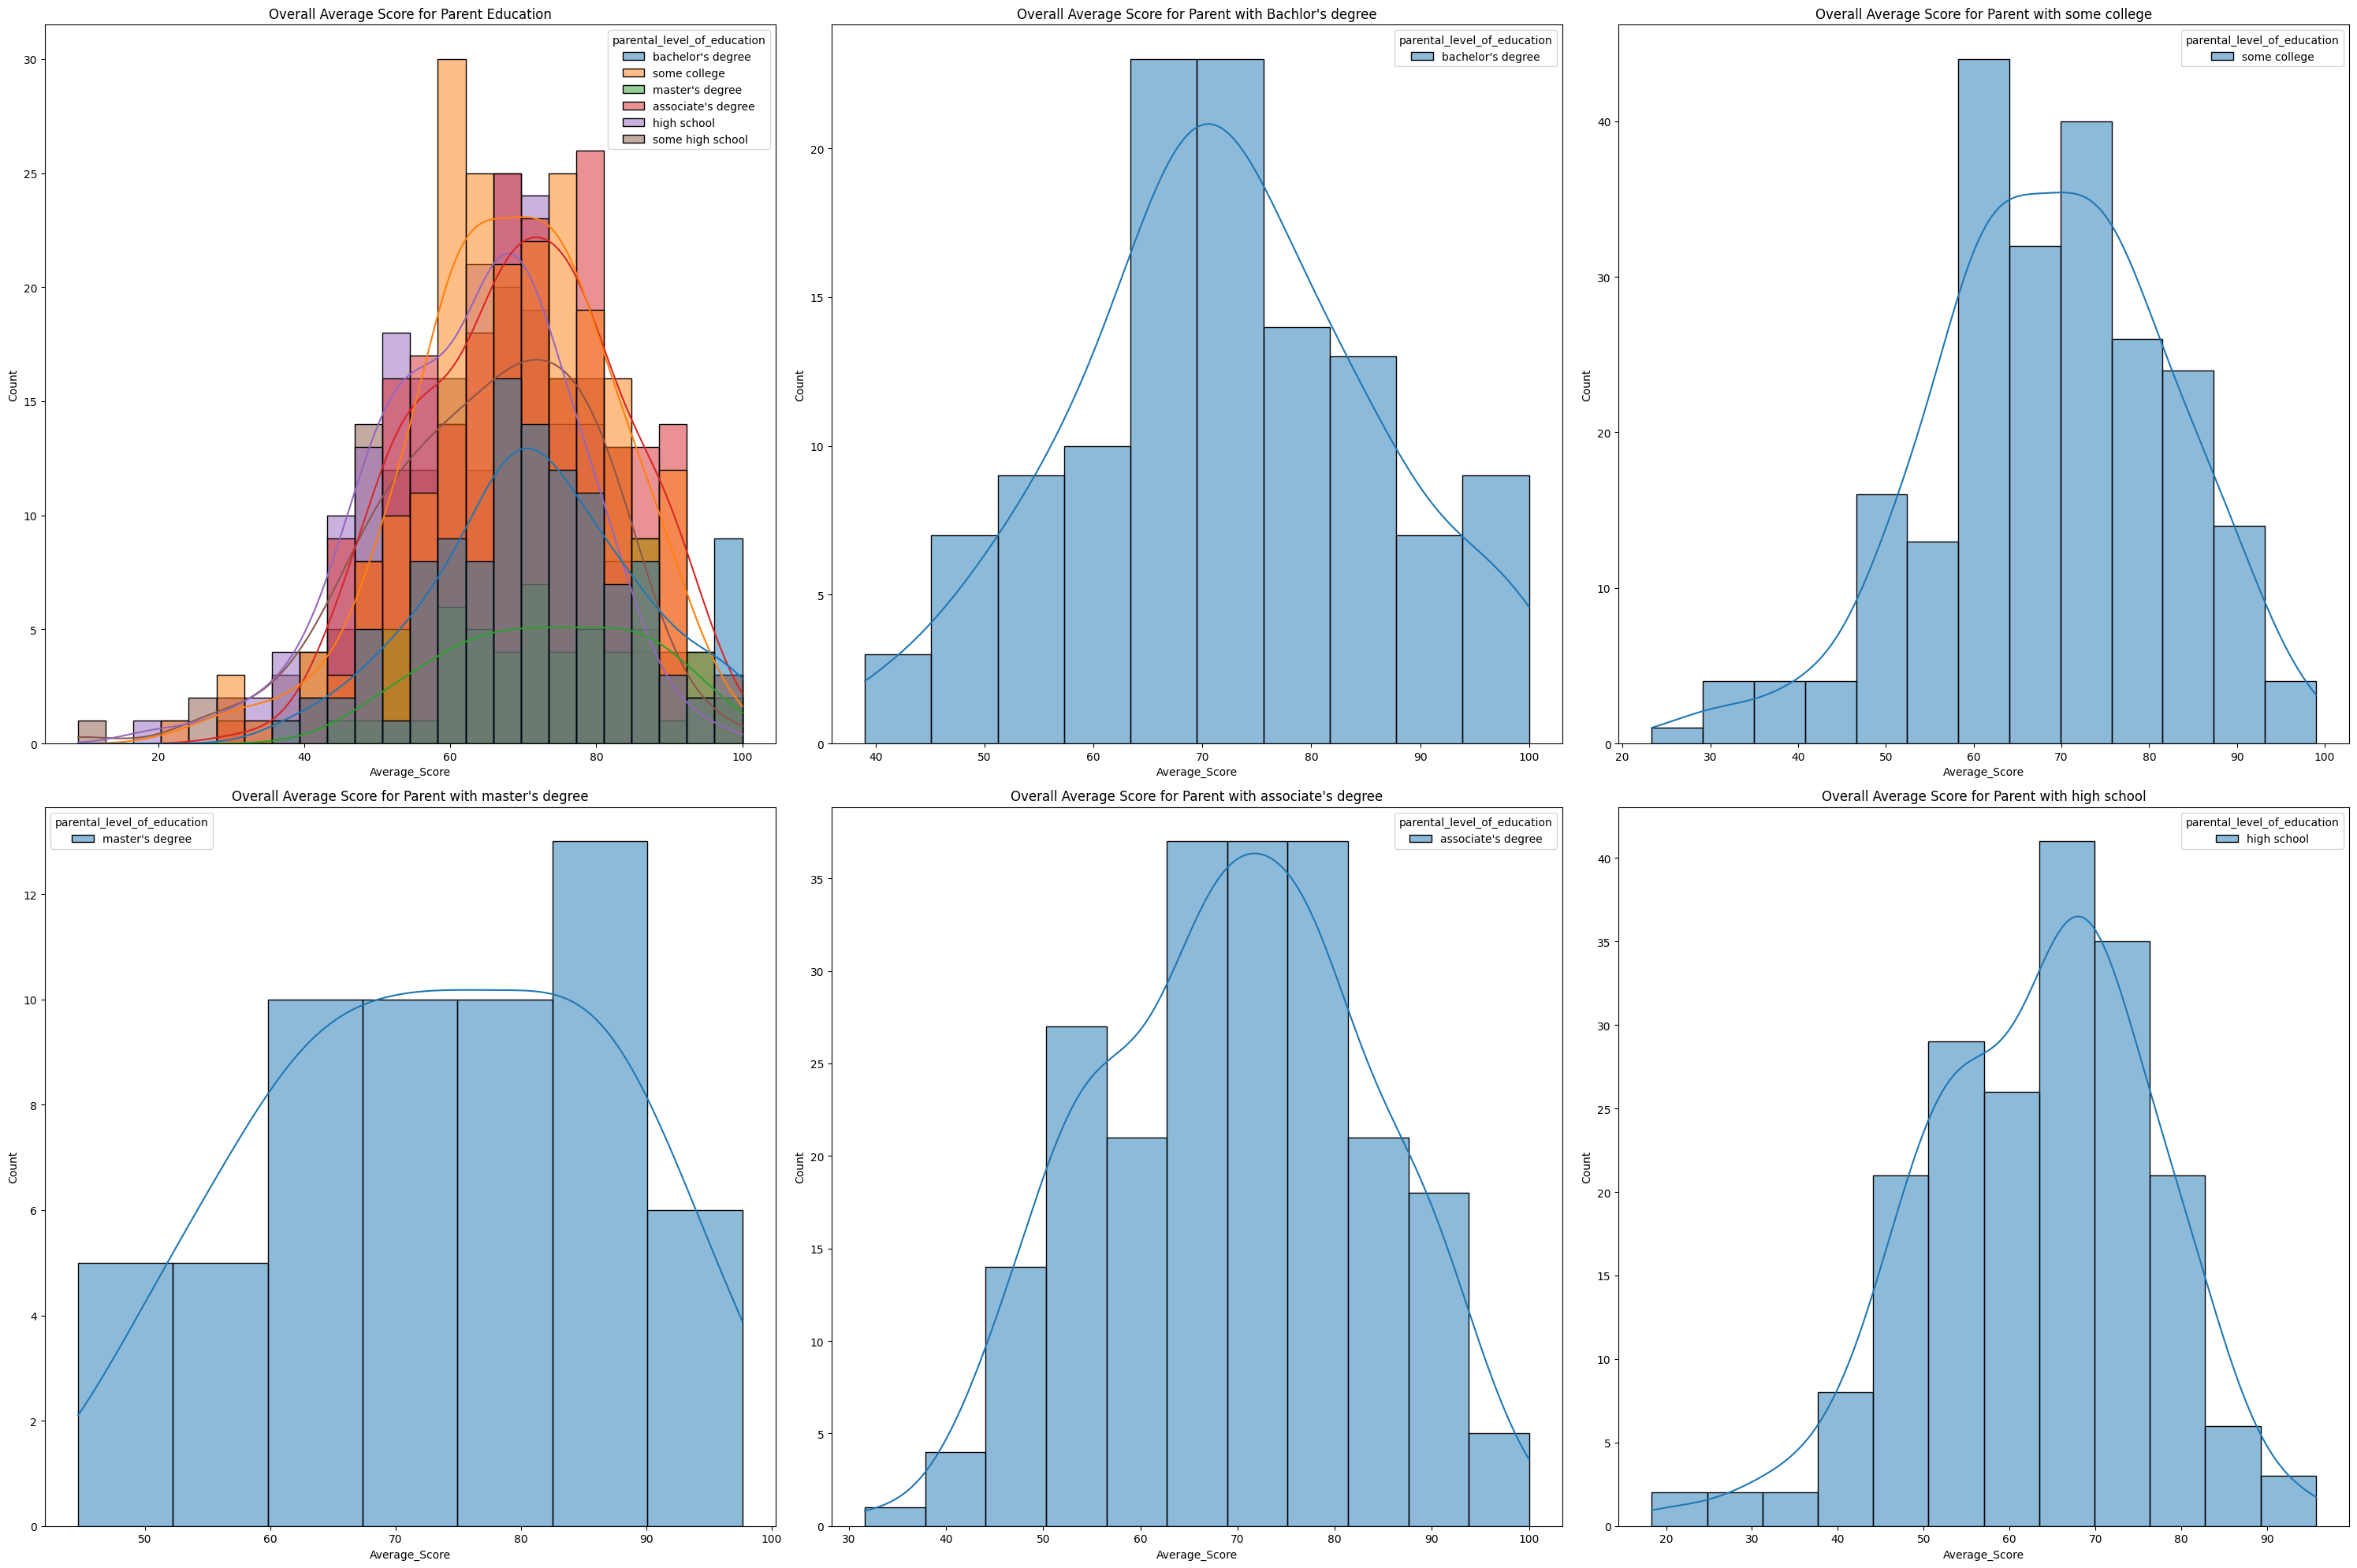

In [139]:
plt.subplots(2,3,figsize=(30,20))
plt.subplot(231)
plt.title('Overall Average Score for Parent Education')
sns.histplot(data=df,x='Average_Score',kde=True,hue='parental_level_of_education')

plt.subplot(232)
plt.title('Overall Average Score for Parent with Bachlor\'s degree')
sns.histplot(data=df[df['parental_level_of_education']=='bachelor\'s degree'],x='Average_Score',kde=True,hue='parental_level_of_education')

plt.subplot(233)
plt.title('Overall Average Score for Parent with some college')
sns.histplot(data=df[df['parental_level_of_education']=='some college'],x='Average_Score',kde=True,hue='parental_level_of_education')

plt.subplot(234)
plt.title('Overall Average Score for Parent with master\'s degree')
sns.histplot(data=df[df['parental_level_of_education']=='master\'s degree'],x='Average_Score',kde=True,hue='parental_level_of_education')

plt.subplot(235)
plt.title('Overall Average Score for Parent with associate\'s degree')
sns.histplot(data=df[df['parental_level_of_education']=='associate\'s degree'],x='Average_Score',kde=True,hue='parental_level_of_education')

plt.subplot(236)
plt.title('Overall Average Score for Parent with high school')
sns.histplot(data=df[df['parental_level_of_education']=='high school'],x='Average_Score',kde=True,hue='parental_level_of_education')


plt.tight_layout()
plt.show()

Insight

- As per our observation we can see much difference in student score according to parent profession.

In [140]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


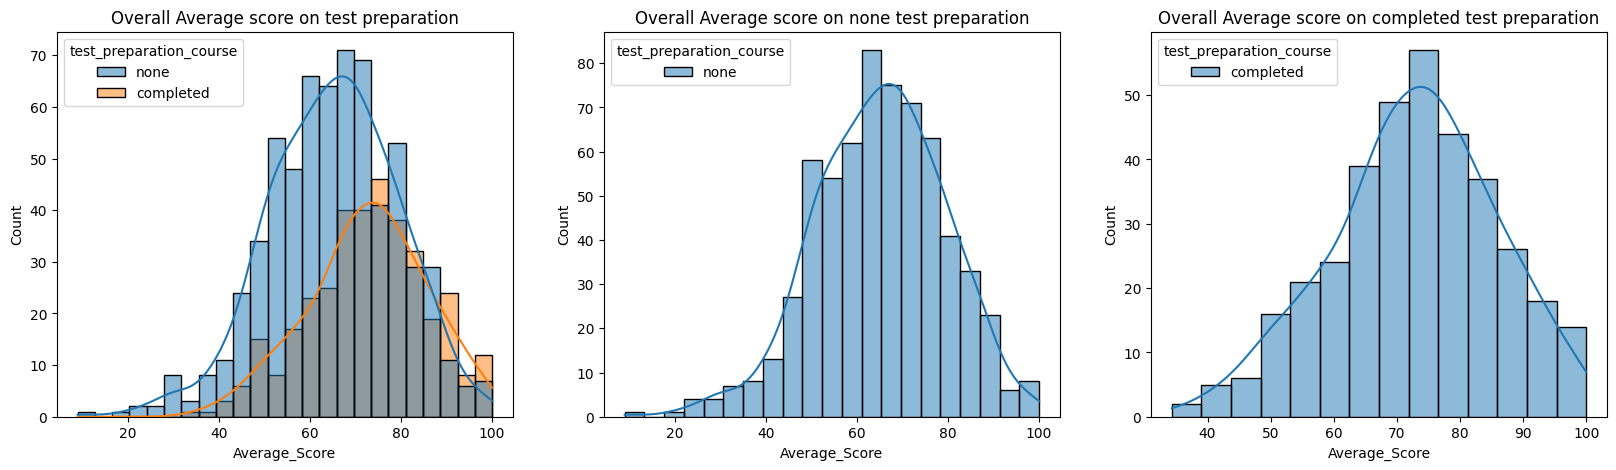

In [143]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
plt.title('Overall Average score on test preparation')
sns.histplot(data=df,x='Average_Score',kde=True,hue='test_preparation_course')
plt.subplot(132)
plt.title('Overall Average score on none test preparation')
sns.histplot(data=df[df['test_preparation_course']=='none'],x='Average_Score',kde=True,hue='test_preparation_course')
plt.subplot(133)
plt.title('Overall Average score on completed test preparation')
sns.histplot(data=df[df['test_preparation_course']=='completed'],x='Average_Score',kde=True,hue='test_preparation_course')
plt.show()

Insight

- From Overall Graph we can some difference in score of student with none and completed test preparation

In [165]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


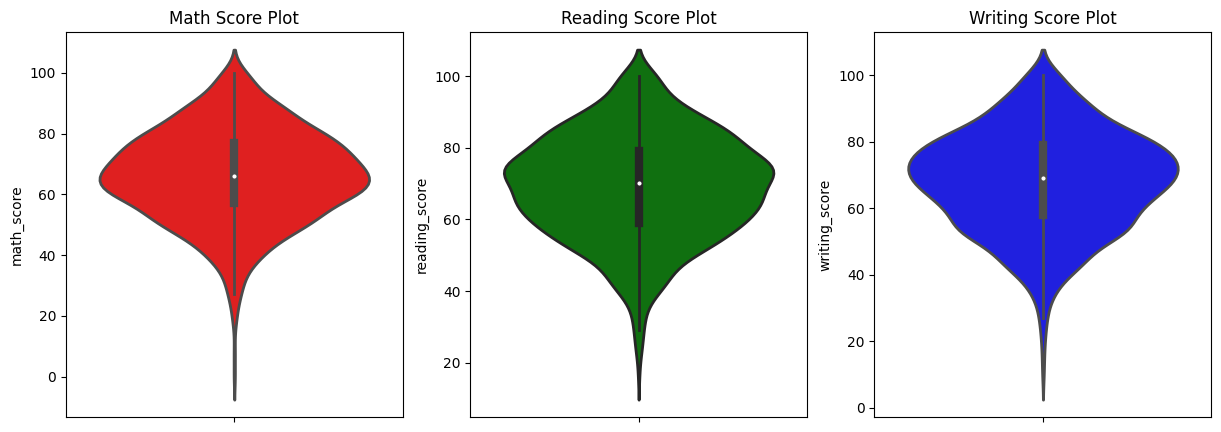

In [163]:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(141)
plt.title("Math Score Plot")
sns.violinplot(data=df,y='math_score',linewidth=2,color='red')
plt.subplot(142)
plt.title("Reading Score Plot")
sns.violinplot(data=df,y='reading_score',linewidth=2,color='green')
plt.subplot(143)
plt.title("Writing Score Plot")
sns.violinplot(data=df,y='writing_score',linewidth=2,color='blue')
plt.show()

Insight
- From the above plot we can see that most of the student scored 55-75 for math and 60-80 for reading and writing scores.

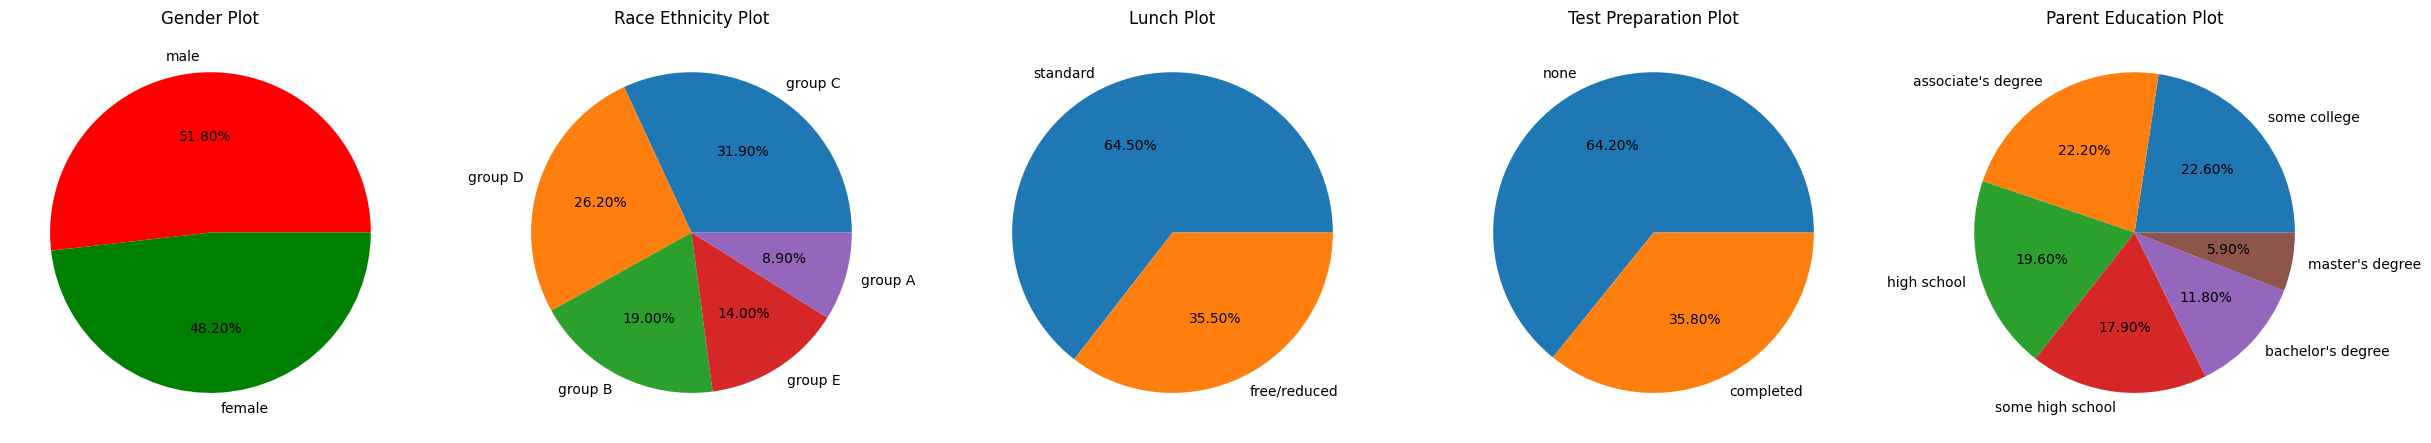

In [208]:
plt.figure(figsize=(30,20))
plt.subplot(1,5,1)
plt.title('Gender Plot')
plt.pie(df['gender'].value_counts(),colors=['red','green'],labels=['male','female'],autopct='%0.2f%%')

plt.subplot(1,5,2)
plt.title('Race Ethnicity Plot')
plt.pie(df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts(normalize=True).index.tolist(),autopct='%0.2f%%')

plt.subplot(1,5,5)
plt.title('Parent Education Plot')
plt.pie(df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts(normalize=True).index.tolist(),autopct='%0.2f%%')

plt.subplot(1,5,4)
plt.title('Test Preparation Plot')
plt.pie(df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts(normalize=True).index.tolist(),autopct='%0.2f%%')

plt.subplot(1,5,3)
plt.title('Lunch Plot')
plt.pie(df['lunch'].value_counts(),labels=df['lunch'].unique(),autopct='%0.2f%%')

plt.show()

Insight
- For Gender Male and female population is same.
- Majority if race_ethnicity is occupied by gropu D and group C.
- Mojority of student have standard lunch.
- Mojority of student done prepare for test.
- There are less parent having bachelor's and higher degree.